# Clustering
In this file, instructions how to approach the challenge can be found.

We can use different types of clustering algorithms:

- KMeans
- Hierarchical
- DBScan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## K-Means Clustering

In [2]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [3]:
# Import neighborhood data
neighborhoods= pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/final_datasets/neighborhood_geo.csv')
neighborhoods.head()

,id,borough,neighborhood,longitude,latitude
0,nyu_2451_34572.1,Bronx,Wakefield,-73.847201,40.894705
1,nyu_2451_34572.2,Bronx,Co-op City,-73.829939,40.874294
2,nyu_2451_34572.3,Bronx,Eastchester,-73.827806,40.887556
3,nyu_2451_34572.4,Bronx,Fieldston,-73.905643,40.895437
4,nyu_2451_34572.5,Bronx,Riverdale,-73.912585,40.890834


In [4]:
# Import scaled feature data
features_scaled = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/final_datasets/features_minmax_scaled.csv')
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,0.742705,0.965681,0.150000,0.916667,0.433333,0.216667,0.166667,1.000000,0.200000,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.774806,0.915060,0.083333,0.650000,0.433333,0.116667,0.066667,0.416667,0.250000,0.616667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.778772,0.947950,0.050000,0.550000,0.266667,0.050000,0.183333,0.383333,0.066667,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.634020,0.967497,0.033333,0.900000,0.450000,0.116667,0.233333,0.083333,0.400000,0.316667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.621109,0.956082,0.050000,0.333333,0.416667,0.150000,0.266667,0.200000,0.383333,0.316667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Import venues sorted
most_common_venues = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/final_datasets/most_common_venues.csv')
most_common_venues.head()

,id,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,nyu_2451_34572.1,church,restaurant,store,school,clothing
1,nyu_2451_34572.2,restaurant,store,clothing,school,church
2,nyu_2451_34572.3,store,restaurant,church,school,clothing
3,nyu_2451_34572.4,restaurant,school,bank,park,store
4,nyu_2451_34572.5,school,bank,restaurant,store,park


### K-Means

In [6]:
# Create elbow graph function
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

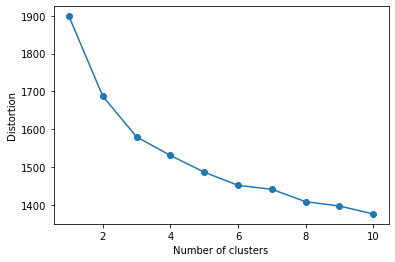

In [7]:
# Plot elbow graph
plot_distortion(features_scaled)

In [8]:
# Cluster data points using kmeans and get labels
kclusters_features = 4

kmeans_features = KMeans(n_clusters=kclusters_features, random_state=0).fit(features_scaled)

kmeans_features.labels_[0:10] 

array([0, 0, 0, 0, 0, 3, 3, 0, 3, 0], dtype=int32)

In [87]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

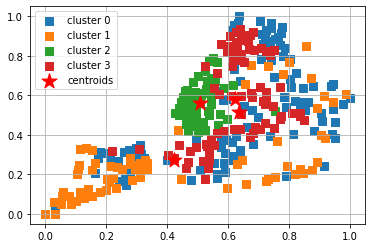

In [88]:
y_km_features = kmeans_features.fit_predict(features_scaled)
plot_clusters(np.array(features_scaled), y_km_features, plt_cluster_centers= True)

In [11]:
# Create list of clusters
clusters = kmeans_features.labels_.tolist()

In [12]:
# Merge venue data with neighborhood data
features_data = neighborhoods.copy()
features_data = pd.merge(features_data, most_common_venues, on='id')
features_data = features_data.drop('id', axis=1)
features_data['clusters'] = clusters
features_data.head()

,borough,neighborhood,longitude,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,clusters
0,Bronx,Wakefield,-73.847201,40.894705,church,restaurant,store,school,clothing,0
1,Bronx,Co-op City,-73.829939,40.874294,restaurant,store,clothing,school,church,0
2,Bronx,Eastchester,-73.827806,40.887556,store,restaurant,church,school,clothing,0
3,Bronx,Fieldston,-73.905643,40.895437,restaurant,school,bank,park,store,0
4,Bronx,Riverdale,-73.912585,40.890834,school,bank,restaurant,store,park,0


In [13]:
#kmeans_clustering = features_data.to_csv('kmean_4_clustering.csv', index=False)

### Mapping

In [14]:
import folium
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors

In [65]:
# Create a map of new york

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Plot clusters on map of New York
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_features)
ys = [i + x + (i*x)**2 for i in range(kclusters_features)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(features_data['latitude'], features_data['longitude'], features_data['neighborhood'],features_data['clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [67]:
import os
import plotly.express as px


def map_scatter(data, latitude='latitude', longitude='longitude', hover_name='neighborhood', color='clusters'):
    # Define mapbox token
    maptoken = os.environ["MAPBOX_TOKEN"]

    # plot points and color by cluster
    fig = px.scatter_mapbox(data, lat=latitude, lon=longitude, hover_name=hover_name, color=color,
                            height=500)
    fig.update_geos(fitbounds="locations")
    fig.update_layout(mapbox_style="light", mapbox_accesstoken=maptoken, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [68]:
map_scatter(features_data)

In [ ]:

fig.write_image("images/fig1.jpeg")

### Analyzing Clusters

In [70]:
cluster0 = features_data.loc[features_data['clusters'] == 0]
cluster1 = features_data.loc[features_data['clusters'] == 1]
cluster2 = features_data.loc[features_data['clusters'] == 2]
cluster3 = features_data.loc[features_data['clusters'] == 3]

In [20]:
cluster0.head()

,borough,neighborhood,longitude,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,clusters
0,Bronx,Wakefield,-73.847201,40.894705,church,restaurant,store,school,clothing,0
1,Bronx,Co-op City,-73.829939,40.874294,restaurant,store,clothing,school,church,0
2,Bronx,Eastchester,-73.827806,40.887556,store,restaurant,church,school,clothing,0
3,Bronx,Fieldston,-73.905643,40.895437,restaurant,school,bank,park,store,0
4,Bronx,Riverdale,-73.912585,40.890834,school,bank,restaurant,store,park,0


In [72]:
print('--cluster0--')
print()
print('Top 3 most common venue type')
print(cluster0['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 3 second most common venue type')
print(cluster0['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster0['borough'].value_counts()[:3])
print()
print('Average ll')
print(cluster0.latitude.mean(), ',', cluster0.longitude.mean())

--cluster0--

Top 3 most common venue type
restaurant    68
store         17
church        10
school         4
Name: 1st Most Common Venue, dtype: int64

Top 3 second most common venue type
store         56
restaurant    18
church        13
school         7
clothing       4
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Queens      35
Bronx       24
Brooklyn    21
Name: borough, dtype: int64

Average ll
40.71407829365659 , -73.90544606253675


In [73]:
print('--cluster1--')
print()
print('Top 3 most common venue type')
print(cluster1['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 3 second most common venue type')
print(cluster1['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster1['borough'].value_counts()[:3])
print()
print('Average ll')
print(cluster1.latitude.mean(), ',', cluster1.longitude.mean())

--cluster1--

Top 3 most common venue type
restaurant    42
store         21
church         3
park           2
clothing       1
Name: 1st Most Common Venue, dtype: int64

Top 3 second most common venue type
store         36
restaurant    19
school         7
church         4
park           2
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Staten Island    42
Queens           21
Bronx             4
Name: borough, dtype: int64

Average ll
40.61579897611594 , -74.01924947856754


In [75]:
print('--cluster2--')
print()
print('Top 3 most common venue type')
print(cluster2['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 3 second most common venue type')
print(cluster2['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster2['borough'].value_counts()[:3])
print()
print('Average ll')
print(cluster2.latitude.mean(), ',', cluster2.longitude.mean())

--cluster2--

Top 3 most common venue type
restaurant    22
school        20
lodging        5
bar            4
office         3
Name: 1st Most Common Venue, dtype: int64

Top 3 second most common venue type
school        21
bar           15
store          9
restaurant     4
bank           3
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Manhattan    34
Brooklyn     20
Queens        4
Name: borough, dtype: int64

Average ll
40.73171648532318 , -73.97346581170383


In [74]:
print('--cluster3--')
print()
print('Top 5 most common venue type')
print(cluster3['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster3['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster3['borough'].value_counts()[:3])

--cluster3--

Top 5 most common venue type
restaurant    39
school        14
store         13
church        12
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         39
church        16
restaurant    10
school         7
clothing       6
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Brooklyn    25
Bronx       24
Queens      21
Name: borough, dtype: int64


# Hierarchical Clustering

In [27]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [28]:
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,0.742705,0.965681,0.150000,0.916667,0.433333,0.216667,0.166667,1.000000,0.200000,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.774806,0.915060,0.083333,0.650000,0.433333,0.116667,0.066667,0.416667,0.250000,0.616667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.778772,0.947950,0.050000,0.550000,0.266667,0.050000,0.183333,0.383333,0.066667,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.634020,0.967497,0.033333,0.900000,0.450000,0.116667,0.233333,0.083333,0.400000,0.316667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.621109,0.956082,0.050000,0.333333,0.416667,0.150000,0.266667,0.200000,0.383333,0.316667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X = np.array(features_scaled)

### Denodrogram

In [30]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

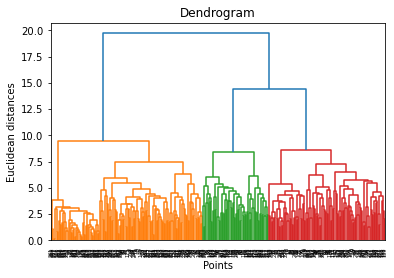

In [31]:
# Plot dendrogram
plot_dendrogram(X)

### Agglomerative Clustering

In [32]:
# Create clustering object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [33]:
# fit and predict
y_hc = ac.fit_predict(features_scaled)

In [85]:
# Create plot
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

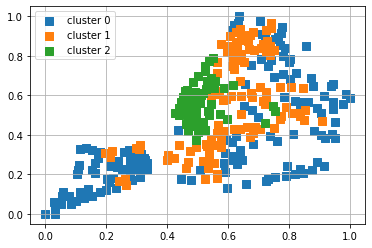

In [86]:
# Plot clustering result
plot_clusters(X,y_hc)

<Figure size 432x288 with 0 Axes>

### Analysing Clusters

In [36]:
clusters_heirarchical = y_hc.tolist()

In [37]:
heirarchical_data = neighborhoods.copy()
heirarchical_data = pd.merge(heirarchical_data, most_common_venues, on='id' )
heirarchical_data = heirarchical_data.drop('id', axis=1)
heirarchical_data['clusters'] = clusters_heirarchical
heirarchical_data.head()

,borough,neighborhood,longitude,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,clusters
0,Bronx,Wakefield,-73.847201,40.894705,church,restaurant,store,school,clothing,1
1,Bronx,Co-op City,-73.829939,40.874294,restaurant,store,clothing,school,church,0
2,Bronx,Eastchester,-73.827806,40.887556,store,restaurant,church,school,clothing,0
3,Bronx,Fieldston,-73.905643,40.895437,restaurant,school,bank,park,store,0
4,Bronx,Riverdale,-73.912585,40.890834,school,bank,restaurant,store,park,0


In [38]:
# heirarchical_clustering = heirarchical_data.to_csv('heirarchical_clustering.csv', index=False)

In [39]:
cluster0_heirarchical = heirarchical_data.loc[heirarchical_data['clusters'] == 0]
cluster1_heirarchical = heirarchical_data.loc[heirarchical_data['clusters'] == 1]
cluster2_heirarchical = heirarchical_data.loc[heirarchical_data['clusters'] == 2]

In [40]:
print('--cluster0--')
print()
print('Top 3 most common venue type')
print(cluster0_heirarchical['1st Most Common Venue'].value_counts()[:3])
print()
print('Top 3 second most common venue type')
print(cluster0_heirarchical['2nd Most Common Venue'].value_counts()[:3])
print()
print('Most common borough')
print(cluster0_heirarchical['borough'].value_counts()[:3])
print()
print('Average ll')
print(cluster0.latitude.mean(), ',', cluster0.longitude.mean())

--cluster0--

Top 3 most common venue type
restaurant    88
store         36
church         7
Name: 1st Most Common Venue, dtype: int64

Top 3 second most common venue type
store         72
restaurant    33
church        13
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Staten Island    54
Queens           47
Bronx            21
Name: borough, dtype: int64

Average ll
40.71407829365659 , -73.90544606253675


In [41]:
print('--cluster1--')
print()
print('Top 3 most common venue type')
print(cluster1_heirarchical['1st Most Common Venue'].value_counts()[:3])
print()
print('Top 3 second most common venue type')
print(cluster1_heirarchical['2nd Most Common Venue'].value_counts()[:3])
print()
print('Most common borough')
print(cluster1_heirarchical['borough'].value_counts()[:3])
print()
print('Average ll')
print(cluster1.latitude.mean(), ',', cluster1.longitude.mean())

--cluster1--

Top 3 most common venue type
restaurant    58
church        18
store         16
Name: 1st Most Common Venue, dtype: int64

Top 3 second most common venue type
store         56
church        20
restaurant    14
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Brooklyn    33
Bronx       31
Queens      29
Name: borough, dtype: int64

Average ll
40.61579897611594 , -74.01924947856754


In [42]:
print('--cluster2--')
print()
print('Top 3 most common venue type')
print(cluster2_heirarchical['1st Most Common Venue'].value_counts()[:3])
print()
print('Top 3 second most common venue type')
print(cluster2_heirarchical['2nd Most Common Venue'].value_counts()[:3])
print()
print('Most common borough')
print(cluster2_heirarchical['borough'].value_counts()[:3])
print()
print('Average ll')
print(cluster2.latitude.mean(), ',', cluster2.longitude.mean())

--cluster2--

Top 3 most common venue type
restaurant    25
school        20
lodging        5
Name: 1st Most Common Venue, dtype: int64

Top 3 second most common venue type
school    20
bar       15
store     12
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Manhattan    35
Brooklyn     20
Queens        5
Name: borough, dtype: int64

Average ll
40.73171648532318 , -73.97346581170383


### Mapping

In [64]:
# Create a map of new york

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Plot clusters on map of New York
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_features)
ys = [i + x + (i*x)**2 for i in range(kclusters_features)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(heirarchical_data['latitude'], heirarchical_data['longitude'], heirarchical_data['neighborhood'],heirarchical_data['clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [69]:
map_scatter(heirarchical_data)

# Segmentation of NYC neighborhoods

The goal of this project is to segment the neighborhoods of New York City into separate clusters and examine the information about them. For clustering, We can use any available information **except** demographic and economic indicators. We don't want to segment them based on those and we want to keep them for the **profiling of clusters** to see if there are any important economic differences between the created clusters.

### Feature Engineering

Feature engineering plays a crucial role in this problem. We have limited amount of attributes so we need to create some features that will be important for segmentation.

- Google Places, Yelp and Foursquare APIs: number of venues, density of venues per square mile, number of restaurants, top restarurant category...
- Uber: number of rides per day in the neighborhood
- Meetups: number of events
- etc...

### Feature Selection / Dimensionality Reduction¶
We need to apply different selection techniques to find out which one will be the best for our problems.

Original Features vs. PCA conponents?

Don't forget to scale the features for KMeans.

### Modeling

Use different attributes and clustering techniques and compare the created clusters:

- clustering only on restaurant features
- clustering only on Uber features
- clustering only on location
- combination of all

**Questions:**
1. Which clustering is the best?
2. How are neighborhoods split when we select only 2 clusters?
3. Are there any differences in housing and rental costs in different clusters?

### Evaluation

1. Check the segmentation evaluation metrics:
    - inertia
    - silhoutte score
2. How did you come up with the correct number of clusters?
3. Is there any relationship between the clusters and economic indicators? If yes, what does it mean?

You are required to share the file containing all NYC neighborhoods together with cluster_id with LighthouseLabs.